# FEATURE SCALING AND TRANSFORMATION

### FEATURE SCALING:
       Feature scaling is the process of scaling down the values of the features to certain range or limit.
      

### WHY FEATURE SCALING ?
        1.All the numerical values present in the feature will have magnitude and units.....for example if the name of the feature is distance and has the value of 135km......here 135 is magnitude and km is the unit
        
        2.If our use case is to find the timetaken to cover the distance we need features like distance,speed.
        
        3.Lets consider the distance is 135km and the speed is 50km/hr....we can also enter this as 135000 m and 50 km/hr
        4.According to theory both the values are same....but if u impute this in the model...the whole process will be wrong because the model takes only the magnitude....so according to the model above 2 cases are not same.
        
        5.So by scaling we can scale down the values to the very minimum range irrespective of the unit.
        
        6.Another reason is in linear regression we will use gradient descent to find the minimum cost function...so the parabola should converge at the global minima point.
        
        7.if we are not scaled down the values the convergence wont be accurate......but if we scaled down the values we can expect some good global minima points
       


### WHERE FEATURE SCALING IS MUST AND WHERE IT IS NOT TO BE USED
    Scaling techniques is must used in algorithms like linear regression,logistic regression,KNN,K means clustering etcc....because in all these algorithms we are calculating some values with the features...for example we will calculate euclidian distance in KNN.
    
    Scaling tecniques should not to be used in tecniques like decision trees,random forest,XGBoost.....if we use also there wont to be any impact.
    
    The conclusion is for every ML algorithms the scaling techniques is not compulsory


### TYPES OF TRANSFORMATIONS
     1. Standardization
     2. Normalization
     3. Robust Scaler
     4. Guassian Transformation
         1.Logarithmic Transformation
         2.Reciprocal Trnasformation
         3.Square Root Transformation
         4.Exponential Trnasformation
         5.Box Cox Transformation    

# 1.STANDARDIZATION  (STANDARD SCALAR)

It is the process of scaling down the values to similar scale 

The values scaled according to the formula Z=X-X_mean/std

scaled down feature will have the mean=0 and std=1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("D:\datasets\kc_house_data.csv",usecols=['sqft_living','sqft_living15'])
data.head()

,sqft_living,sqft_living15
0,1180,1340
1,2570,1690
2,770,2720
3,1960,1360
4,1680,1800


In [31]:
data.isnull().sum()

sqft_living      0
sqft_living15    0
dtype: int64

In [57]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_scaled=scale.fit_transform(data)
pd.DataFrame(data_scaled).head()

,0,1
0,-0.979835,-0.943355
1,0.533634,-0.432686
2,-1.426254,1.070140
3,-0.130550,-0.914174
4,-0.435422,-0.272190


The above table is the table with scaled values using standard scalar

In [41]:
data_scaled

array([[-0.97983502, -0.9433552 ],
       [ 0.53363434, -0.43268619],
       [-1.42625404,  1.07013975],
       ...,
       [-1.15404732, -1.41025258],
       [-0.52252773, -0.8412214 ],
       [-1.15404732, -1.41025258]])

(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-1.94889094, -0.50619533,  0.93650029,  2.3791959 ,  3.82189151,
         5.26458713,  6.70728274,  8.14997836,  9.59267397, 11.03536958,
        12.4780652 ]),
 <BarContainer object of 10 artists>)

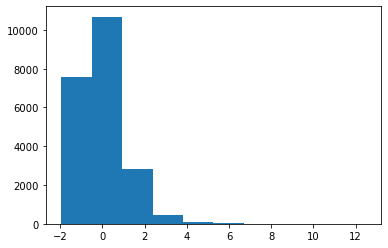

In [74]:
plt.hist(data_scaled[:,0],bins=10)

(array([ 312., 6440., 7587., 4200., 2004.,  731.,  235.,   84.,   12.,
           8.]),
 array([-2.3163253 , -1.46846884, -0.62061239,  0.22724407,  1.07510053,
         1.92295699,  2.77081345,  3.61866991,  4.46652636,  5.31438282,
         6.16223928]),
 <BarContainer object of 10 artists>)

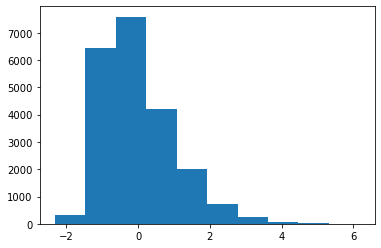

In [73]:
plt.hist(data_scaled[:,1],bins=10)

The above two histograms are representation of scaled values....that is normally distributed features after scaling.

# 2.NORMALIZATION (MIN-MAX SCALAR)

Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scale1=MinMaxScaler()
data1_scaled=scale1.fit_transform(data)
pd.DataFrame(data1_scaled).head()

,0,1
0,0.067170,0.161934
1,0.172075,0.222165
2,0.036226,0.399415
3,0.126038,0.165376
4,0.104906,0.241094


(array([7.5700e+03, 1.0714e+04, 2.7800e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

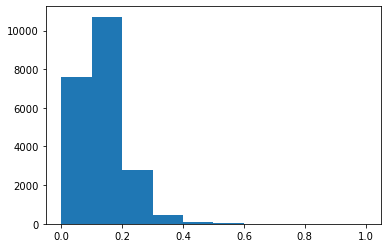

In [75]:
plt.hist(data1_scaled[:,0],bins=10)

(array([ 312., 6440., 7587., 4200., 2004.,  731.,  235.,   84.,   12.,
           8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

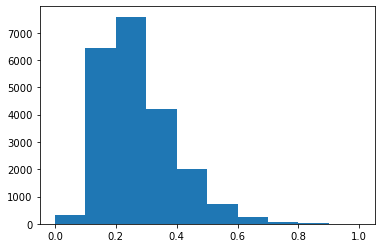

In [77]:
plt.hist(data1_scaled[:,1],bins=10)

above 2 histograms are representation of values after minmaxscaler

# 3.ROBUST SCALER

It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9th quantile-90 percentile---90% of all values in this group is less than 9
1st quantile-10 precentile---10% of all values in this group is less than 1
4th quantile-40 precentile---40% of all values in this group is less than 4

Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.

In [81]:
from sklearn.preprocessing import RobustScaler
rob_scale=RobustScaler()
robust=rob_scale.fit_transform(data)
pd.DataFrame(robust).head()

,0,1
0,-0.650045,-0.574713
1,0.587711,-0.172414
2,-1.015138,1.011494
3,0.044524,-0.551724
4,-0.204809,-0.045977


(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-1.44256456, -0.26268923,  0.91718611,  2.09706144,  3.27693678,
         4.45681211,  5.63668744,  6.81656278,  7.99643811,  9.17631345,
        10.35618878]),
 <BarContainer object of 10 artists>)

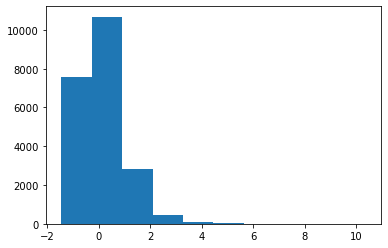

In [82]:
plt.hist(robust[:,0],bins=10)

(array([ 312., 6440., 7587., 4200., 2004.,  731.,  235.,   84.,   12.,
           8.]),
 array([-1.65632184, -0.9883908 , -0.32045977,  0.34747126,  1.0154023 ,
         1.68333333,  2.35126437,  3.0191954 ,  3.68712644,  4.35505747,
         5.02298851]),
 <BarContainer object of 10 artists>)

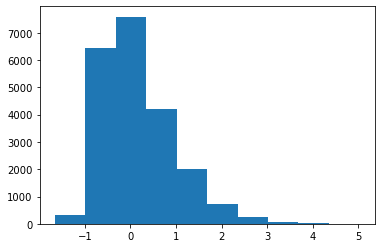

In [84]:
plt.hist(robust[:,1],bins=10)

The above two histograms are representation of scaled values

# 4.GUASSIAN TRANSFORMATION
        The feature will perform well when it is normally distributed........so guassion transformation deals with transformation of features to normally distributed feature
        
        if it is normally distributed it will give good accuracy and good performance

### It has 5 types

### 1.LOGARTHMIC TRANSFORMATION

Logarthmic transformation reduces the skewness of the original data

this tranformation can be used when the data is left or right skewed

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import pylab 
def plot_data(data,feature):
    plt.figure(figsize=(10,6)) # sets the size of each graph
    plt.subplot(1,2,1)         #by using subplot we can produce graphs in same cell...plt.subplot(1 row 2 columns 1st index)
    data[feature].hist()
    plt.subplot(1,2,2)         #plt.subplot(1 row 2 columns 2nd index)
    stat.probplot(data[feature],dist='norm',plot=pylab) ##qqplot
    plt.show()
    

### QQ-PLOT
In Statistics, Q-Q(quantile-quantile) plots play a very vital role to graphically analyze and compare two probability distributions by plotting their quantiles against each other. If the two distributions which we are comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x.


If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot.


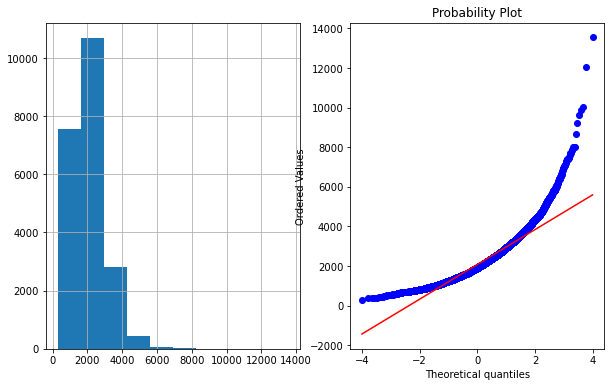

In [86]:
plot_data(data,'sqft_living')

By seeing qq plot we can say that the data is not normally distributed and also the data seemed to be right skewed so we are using logarthmic transformation

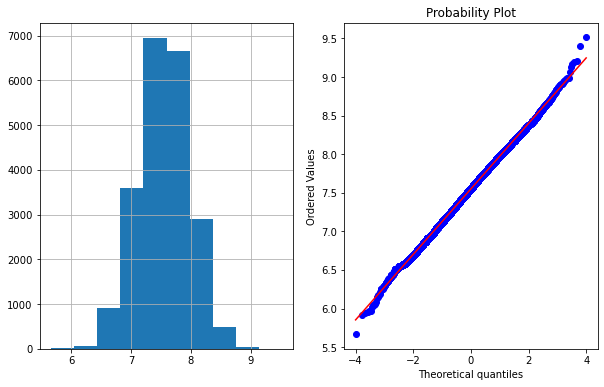

In [18]:
import numpy as np
data['sqft_log']=np.log(data['sqft_living'])
plot_data(data,'sqft_log')

By seeing the qq plot we can say that the data transformned are normally distributed because the points are in the line

During logarthmic transformation if the feature contains value 0 np.log() because log 0 is undefined....in such case we can use np.log1p Which returns values of log(x+1)

### 2.RECIPROCAL TRANSFORMATION
It can be used with nonzero data and is commonly used when distributions have skewness or clear outliers. Also called inverse transformation. ...

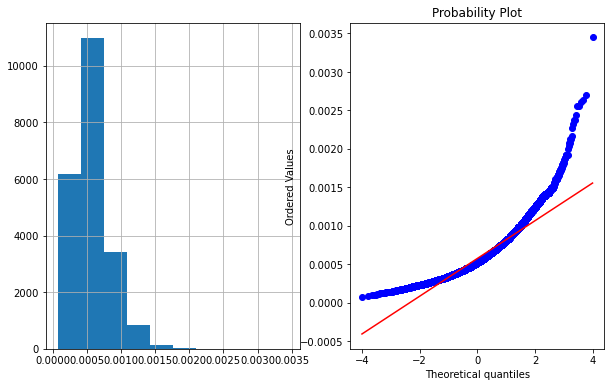

In [88]:
data['sqft_rec']=1/data['sqft_living']
plot_data(data,'sqft_rec')

### 3.SQUARE ROOT TRANSFORMATION
The square root, x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape: it is weaker than the logarithm and the cube root. It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values.

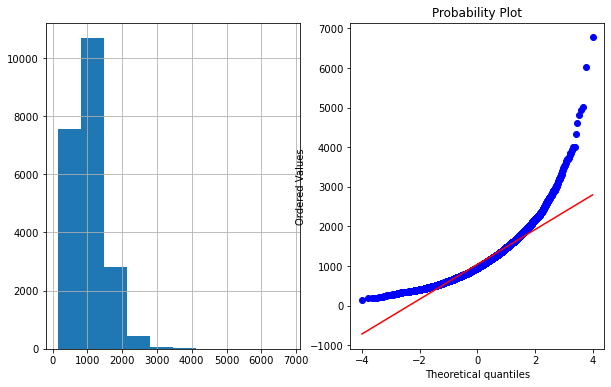

In [90]:
data['sqft_square']=data['sqft_living']**1/2
plot_data(data,'sqft_square')

### 4.EXPONENTIAL TRANSFORMATION
In exponential transformation we can easily set the exponent as a parameter and provide a continuous range to explore. Although this choice excludes some strongly non-linear bounds, it returns good results in general.

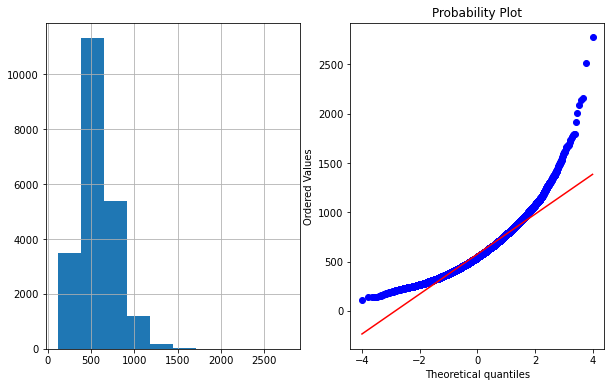

In [91]:
data['sqft_exp']=data['sqft_living']**(1/1.2)
plot_data(data,'sqft_exp')

### 5.BOX-COX TRANSFORMATION
The Box-Cox transformation transforms our data so that it closely resembles a normal distribution.

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [95]:
data['sqft_Box'],parameters=stat.boxcox(data['sqft_living'])
print(parameters)

0.028409092528514278


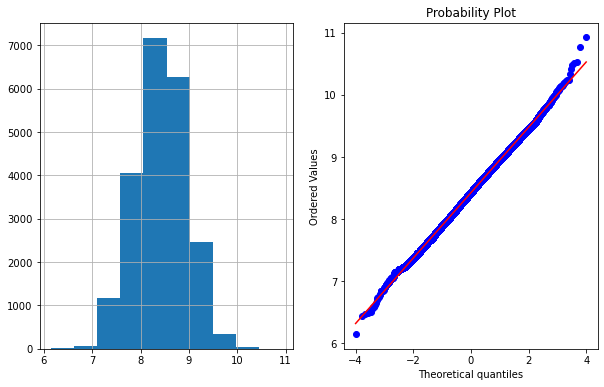

In [96]:
plot_data(data,'sqft_Box')

### So from all transformations in gaussian transformation.....logarthmic and box cox transformation is best choice for the above dataset that is house price prediction. because all the points lie on the line in qq plot
